In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('final_twitterDatanew.csv')
df.columns

Index(['user_location', 'latitude', 'longitude', 'created_at', 'id', 'text',
       'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'in_reply_to_screen_name', 'user_id', 'user_name', 'user_screen_name',
       'user_description', 'user_followers_count', 'user_friends_count',
       'user_listed_count', 'user_favourites_count', 'user_statuses_count',
       'user_created_at', 'coordinates', 'place', 'is_quote_status',
       'favorite_count', 'lang', 'image_url'],
      dtype='object')

In [3]:
df

,user_location,latitude,longitude,created_at,id,text,source,truncated,in_reply_to_status_id,in_reply_to_user_id,...,user_listed_count,user_favourites_count,user_statuses_count,user_created_at,coordinates,place,is_quote_status,favorite_count,lang,image_url
0,"London, England",51.507336,-0.127650,2023-06-24 21:16:45+00:00,1672715409433190400,@HothfieldPlace All that pollution what “appar...,Twitter for iPhone,False,1.672699e+18,1.406968e+18,...,0,312,704,2022-12-20 15:52:12+00:00,NaN,NaN,False,0,en,NaN
1,East Cheshire,53.089516,-2.432569,2023-06-24 21:08:08+00:00,1672713238255992834,@PetenShirl Means a lower gear and mor polluti...,Twitter Web App,False,1.671498e+18,7.188028e+07,...,1,134,3104,2022-08-31 18:58:21+00:00,NaN,NaN,False,0,en,NaN
2,"Kensington, London",51.500842,-0.179150,2023-06-24 20:39:56+00:00,1672706144815415296,@toryboypierce @mailplus Londoners want ULEZ\n...,Twitter for iPhone,False,1.672705e+18,1.944467e+09,...,0,9438,4711,2022-04-07 15:05:13+00:00,NaN,NaN,False,2,en,https://pbs.twimg.com/tweet_video_thumb/FzalXs...
3,UK,54.702354,-3.276575,2023-06-24 20:38:54+00:00,1672705883921326081,#LTN have reduced road space redundancy in the...,Twitter for Android,False,NaN,NaN,...,3,62642,54919,2020-10-25 15:08:34+00:00,NaN,NaN,True,3,en,NaN
4,"Birmingham, England",52.479699,-1.902691,2023-06-24 20:33:47+00:00,1672704594655191047,@YBcabbie @suemitch2017 @BBC @Keir_Starmer @Co...,Twitter for Android,False,1.672692e+18,1.849338e+09,...,4,34524,28163,2020-03-13 11:47:00+00:00,NaN,NaN,False,0,en,https://pbs.twimg.com/media/Fzaj9tpWIAEcwJa.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7678,Auvergne,54.421697,-1.234967,2023-06-19 02:02:15+00:00,1670612929178116097,"""@JackyBerland @BonGrosDodo This concerns the ...",Twitter Web App,False,1.670613e+18,1.466109e+18,...,8,9420,6602,2021-12-01 18:15:45+00:00,NaN,NaN,False,1,fr,NaN
7679,"Boulogne-Billancourt, France",NaN,NaN,2023-06-18 22:05:34+00:00,1670553363966984196,"Well, that's great, I must say. So, in additio...",Twitter for iPhone,False,NaN,NaN,...,0,1939,3378,2022-10-01 17:19:03+00:00,NaN,"Paris, France",True,3,fr,NaN
7680,"Paris, France",NaN,NaN,2023-06-18 19:13:07+00:00,1670509969148354560,"""@pascalCenteam @f_philippot I'm responding to...",Twitter for iPhone,False,1.670505e+18,8.114870e+08,...,1,27016,54241,2021-10-04 19:00:22+00:00,NaN,NaN,True,0,fr,NaN
7681,"La Roche-sur-Yon, France",NaN,NaN,2023-06-18 18:35:13+00:00,1670500430122561542,"'@Bruno_Attal_ And pollution, what a big mess,...",Twitter for Android,False,1.670438e+18,1.433049e+18,...,0,182,405,2023-03-26 20:27:23+00:00,NaN,NaN,False,1,fr,NaN


In [4]:
df = df[['user_location','longitude','latitude','created_at', 'text',
    'source', 'truncated', 'user_name', 'user_screen_name', 'user_description',
    'favorite_count','place','user_created_at','user_statuses_count','user_favourites_count',
    'user_listed_count', 'user_friends_count','user_followers_count','lang', 'image_url']]
df

,user_location,longitude,latitude,created_at,text,source,truncated,user_name,user_screen_name,user_description,favorite_count,place,user_created_at,user_statuses_count,user_favourites_count,user_listed_count,user_friends_count,user_followers_count,lang,image_url
0,"London, England",-0.127650,51.507336,2023-06-24 21:16:45+00:00,@HothfieldPlace All that pollution what “appar...,Twitter for iPhone,False,we are considerate,Shelly44901415,NaN,0,NaN,2022-12-20 15:52:12+00:00,704,312,0,35,30,en,NaN
1,East Cheshire,-2.432569,53.089516,2023-06-24 21:08:08+00:00,@PetenShirl Means a lower gear and mor polluti...,Twitter Web App,False,John,Glenrosa7fc,Previously:- John - lets get on with it. @ I...,0,NaN,2022-08-31 18:58:21+00:00,3104,134,1,7,15,en,NaN
2,"Kensington, London",-0.179150,51.500842,2023-06-24 20:39:56+00:00,@toryboypierce @mailplus Londoners want ULEZ\n...,Twitter for iPhone,False,Mrs Kensington,Londonlife44,NaN,2,NaN,2022-04-07 15:05:13+00:00,4711,9438,0,1311,186,en,https://pbs.twimg.com/tweet_video_thumb/FzalXs...
3,UK,-3.276575,54.702354,2023-06-24 20:38:54+00:00,#LTN have reduced road space redundancy in the...,Twitter for Android,False,The UK LTN Résistance,ioisours,Group supporting people across the UK against ...,3,NaN,2020-10-25 15:08:34+00:00,54919,62642,3,546,3215,en,NaN
4,"Birmingham, England",-1.902691,52.479699,2023-06-24 20:33:47+00:00,@YBcabbie @suemitch2017 @BBC @Keir_Starmer @Co...,Twitter for Android,False,Sir Digby,SirDigby6,Sarcastic meldrewnian moaner watching a twilig...,0,NaN,2020-03-13 11:47:00+00:00,28163,34524,4,1641,813,en,https://pbs.twimg.com/media/Fzaj9tpWIAEcwJa.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7678,Auvergne,-1.234967,54.421697,2023-06-19 02:02:15+00:00,"""@JackyBerland @BonGrosDodo This concerns the ...",Twitter Web App,False,AdrienBàlG ⏚,AdrienBalG,"Cueilleur de plantes sauvages, apiculteur, nat...",1,NaN,2021-12-01 18:15:45+00:00,6602,9420,8,419,165,fr,NaN
7679,"Boulogne-Billancourt, France",NaN,NaN,2023-06-18 22:05:34+00:00,"Well, that's great, I must say. So, in additio...",Twitter for iPhone,False,Barbie Pecresse,Drxgonz75,NaN,3,"Paris, France",2022-10-01 17:19:03+00:00,3378,1939,0,214,92,fr,NaN
7680,"Paris, France",NaN,NaN,2023-06-18 19:13:07+00:00,"""@pascalCenteam @f_philippot I'm responding to...",Twitter for iPhone,False,Noé,No94559907,Contre les pass et les mensonges en général. J...,0,NaN,2021-10-04 19:00:22+00:00,54241,27016,1,2475,1046,fr,NaN
7681,"La Roche-sur-Yon, France",NaN,NaN,2023-06-18 18:35:13+00:00,"'@Bruno_Attal_ And pollution, what a big mess,...",Twitter for Android,False,tony,tony03954289794,Une femme c'est comme un enfants on les aimes ...,1,NaN,2023-03-26 20:27:23+00:00,405,182,0,53,13,fr,NaN


In [5]:
df = df[df.lang == 'en']

In [6]:
df['user_location'] = df['user_location'].replace('UK', 'United Kingdom')

In [7]:
# Grouping by 'user_location' and counting the tweets for each location
def tweetsource(df):
    source_tweet_counts = df.groupby('source').size().reset_index(name='source_count')
    source_tweet_counts = source_tweet_counts.sort_values(by='source_count', ascending=False)

    #top 10 locations with the highest tweet counts
    top_10_locations = source_tweet_counts.head(10)
    return top_10_locations
top_10_source = tweetsource(df)
top_10_source

,source,source_count
28,Twitter for Android,2975
31,Twitter for iPhone,2515
27,Twitter Web App,1793
30,Twitter for iPad,163
24,TweetDeck,15
4,Buffer,12
23,Tweet Hunter Pro,9
13,Metricool,5
9,Hootsuite Inc.,5
36,dlvr.it,4


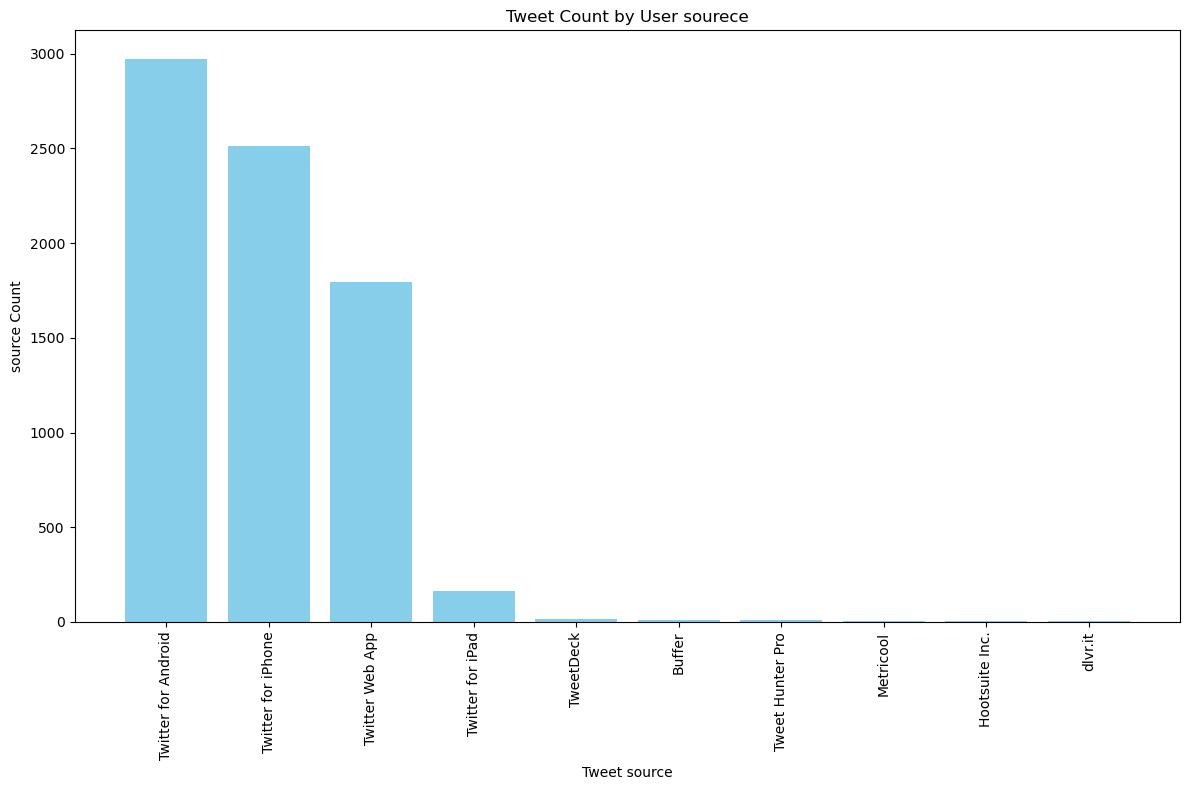

In [8]:
def plotTweetSource(top_10_source):
    """
    Create a bar plot for the top user sources and their tweet counts.

    Parameters:
        top_10_sources (DataFrame): DataFrame containing 'source' and 'source_count' columns.

    Returns:
        None
    """
    plt.figure(figsize=(12, 8))
    plt.bar(top_10_source['source'], top_10_source['source_count'], color='skyblue')
    plt.xlabel('Tweet source')
    plt.ylabel('source Count')
    plt.title('Tweet Count by User sourece')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
plotTweetSource(top_10_source)

 the above chart shows the distributions of tweet sources, i clearly shows that twitter for androide has the highest tweet counts followed by teitter for iphone and web app etc.
 
 ------------

here are the distribution of languages available in the tweets gathere

In [9]:
df.truncated.nunique()

1

In [10]:
# Grouping by 'user_location' and counting the tweets for each location
def tweet_cout(df):
    location_tweet_counts = df.groupby('user_location').size().reset_index(name='tweet_count')
    location_tweet_counts = location_tweet_counts.sort_values(by='tweet_count', ascending=False)

    #top 10 locations with the highest tweet counts
    top_10_locations = location_tweet_counts.head(10)
    return top_10_locations
top_10_locations = tweet_cout(df)
top_10_locations

,user_location,tweet_count
1774,United Kingdom,111
984,"London, England",76
1776,United States,44
573,"England, United Kingdom",43
924,"Lagos, Nigeria",41
1056,"Melbourne, Victoria",37
979,London,32
2234,she/her,28
619,"Florida, USA",20
1852,West Sussex,18


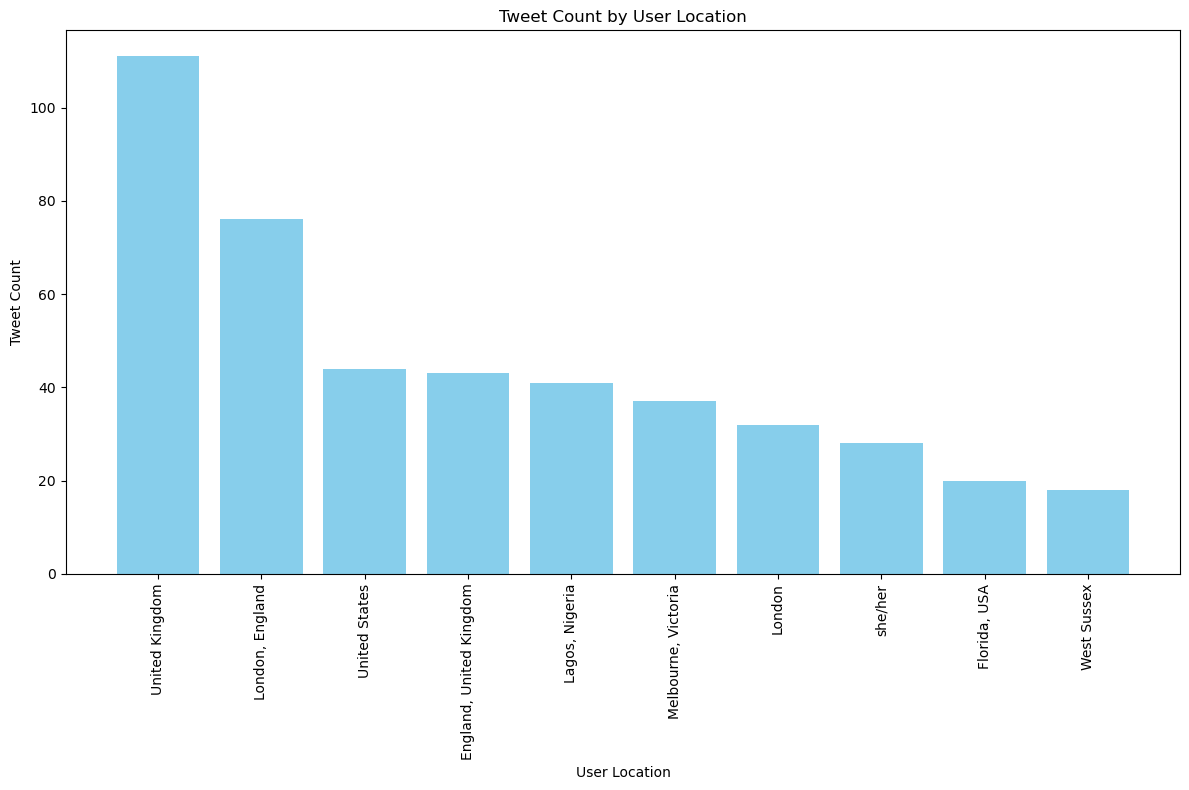

In [11]:
import matplotlib.pyplot as plt

def plot_top_user_locations(top_10_locations):
    """
    Create a bar plot for the top user locations and their tweet counts.

    Parameters:
        top_10_locations (DataFrame): DataFrame containing 'user_location' and 'tweet_count' columns.

    Returns:
        None
    """
    plt.figure(figsize=(12, 8))
    plt.bar(top_10_locations['user_location'], top_10_locations['tweet_count'], color='skyblue')
    plt.xlabel('User Location')
    plt.ylabel('Tweet Count')
    plt.title('Tweet Count by User Location')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
plot_top_user_locations(top_10_locations)

The above chart shows the distribution of tweets with respect to different cities in UK, where locations specified as United Kingdom has the highest distribution followed by London. England and Paris, France etc.

-------------------

top hashtags used in the tweets

In [12]:
import re

# Function to extract hashtags from tweet text
def extract_hashtags(text):
    return re.findall(r'#\w+', text)

# Extracting hashtags from the 'text' column and flattening the list
hashtags_list = df['text'].apply(extract_hashtags).explode()

# Counting the occurrences of each hashtag
top_hashtags = hashtags_list.value_counts().head(43)
print(top_hashtags)

#에스파                    207
#aespa                  186
#카리나                    145
#Karina                 144
#SeattlePride            78
#UN                      74
#Pride                   57
#NINGNING                39
#닝닝                      38
#Tigray                  38
#genshinimpactfanart     36
#Xiao                    36
#Tigrayns                36
#GenshinImpact           36
#iKON_TAKEOFFinESSEN     31
#pollution               27
#지젤                      24
#GISELLE                 24
#AESPA                   23
#22                      22
#Pollution               20
#BREAKING                19
#LightPollution          18
#𝑴𝒊𝒛𝒐                    18
#Airdrop                 17
#Beyourluve              17
#SwitchOffTheLights      17
#BuildJakpan             16
#water                   14
#ResidentEvil            14
#连麦                      14
#Nivanfield              14
#helluvaboss             13
#磕炮                      13
#代发                      13
#推广                 

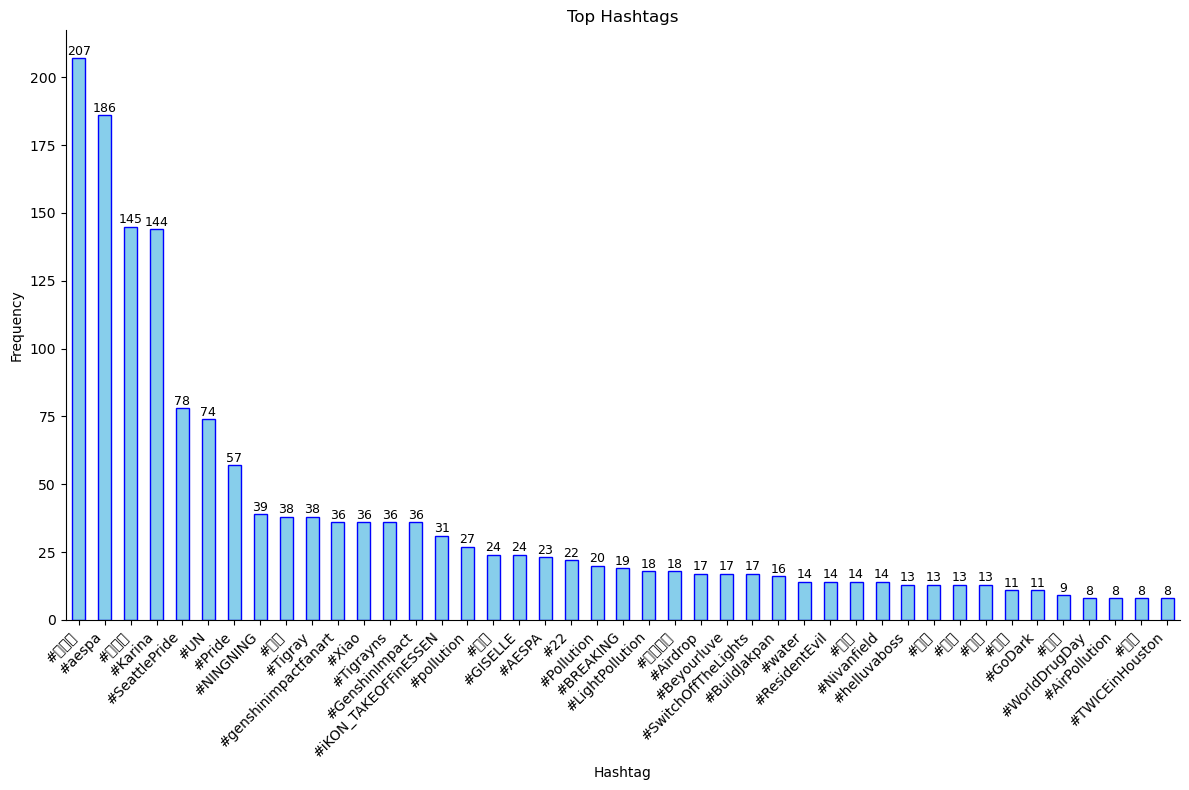

In [13]:
def plot_top_hashtags(top_hashtags):
    # Plot configuration
    plt.figure(figsize=(12, 8))
    ax = top_hashtags.plot(kind='bar', color='skyblue', edgecolor='b')
    
    # Add labels and title
    plt.xlabel('Hashtag')
    plt.ylabel('Frequency')
    plt.title('Top Hashtags')
    
    # Remove the top and right spines for cleaner look
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Add value labels above the bars
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=9)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming 'top_hashtags' is your DataFrame or Series containing top hashtags data
plot_top_hashtags(top_hashtags);

from the above we can see a multiple appeaance of polution the in the hashtags used
- pollution
- Light pollution
- water
- airpollution 
- Pollution
etc

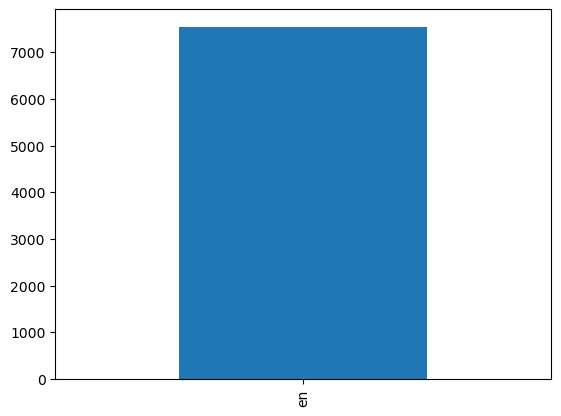

In [14]:
df.lang.value_counts().plot(kind = 'bar');

In [15]:
# Calculating the correlation between 'user_followers_count' and 'user_statuses_count'
correlation = df['user_followers_count'].corr(df['user_statuses_count'])
print(f"Correlation between followers count and tweet count: {correlation}")


Correlation between followers count and tweet count: 0.11432277654809901


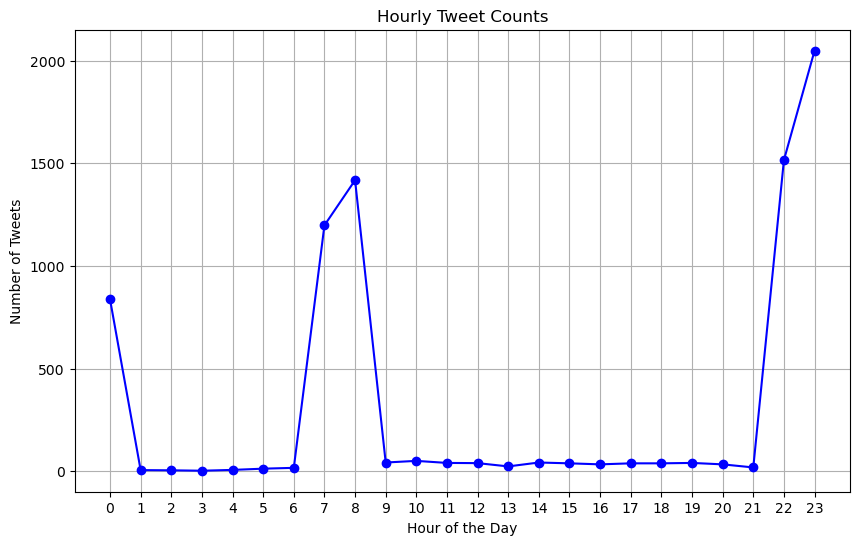

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_hourly_tweet_counts(df):
    # Converting 'created_at' column to datetime
    df['created_at'] = pd.to_datetime(df['created_at'])

    # Extracting the hour of the day from 'created_at'
    df['hour_of_day'] = df['created_at'].dt.hour

    # Counting the number of tweets for each hour of the day
    hourly_tweet_counts = df['hour_of_day'].value_counts().sort_index()

    # Plotting the hourly tweet counts
    plt.figure(figsize=(10, 6))
    plt.plot(hourly_tweet_counts.index, hourly_tweet_counts.values, marker='o', linestyle='-', color='b')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Tweets')
    plt.title('Hourly Tweet Counts')
    plt.xticks(range(24))  # Set x-axis ticks to show all 24 hours
    plt.grid(True)
    plt.show()

# Example usage:
# Assuming 'df' is your DataFrame containing tweet data
plot_hourly_tweet_counts(df)


The above chart show that 
- we have the highest number of people tweeting between 21pm and 24/0am
- between 6am to 9am we tend to have high populations of people making tweets
- between 9am to 21pm which is the late hour when people appears to be sleeping/resting tweeting tends to drop and same thing applicable to 24/0am to 6am

In [17]:
import geopandas as gpd

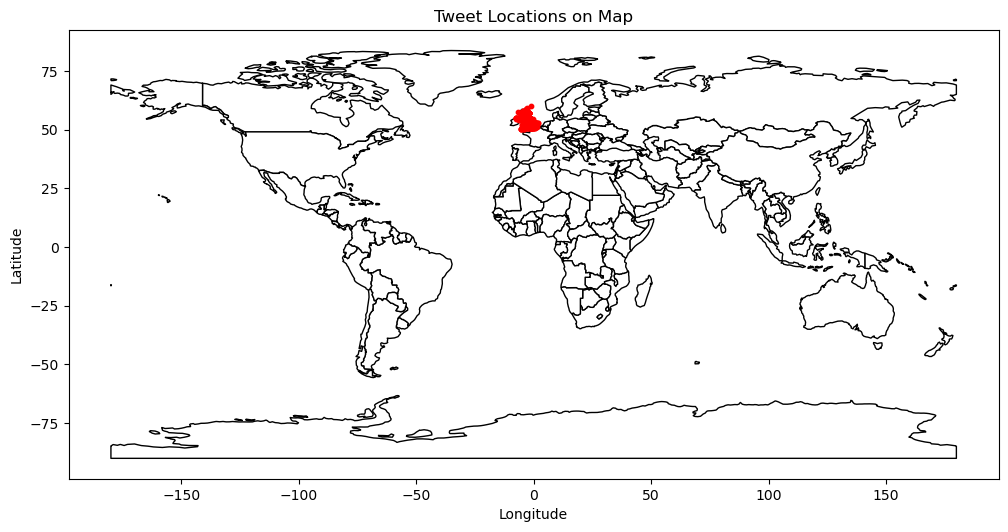

In [18]:
# Create a GeoDataFrame from the dataframe
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Create the map plot
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(12, 8), color='white', edgecolor='black')

# Plot the latitude and longitude points on the map
gdf.plot(ax=ax, color='red', markersize=10)

# Customize the plot
plt.title('Tweet Locations on Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


the red region part shows a cluster of users location in the world map (UK precisely)

--------

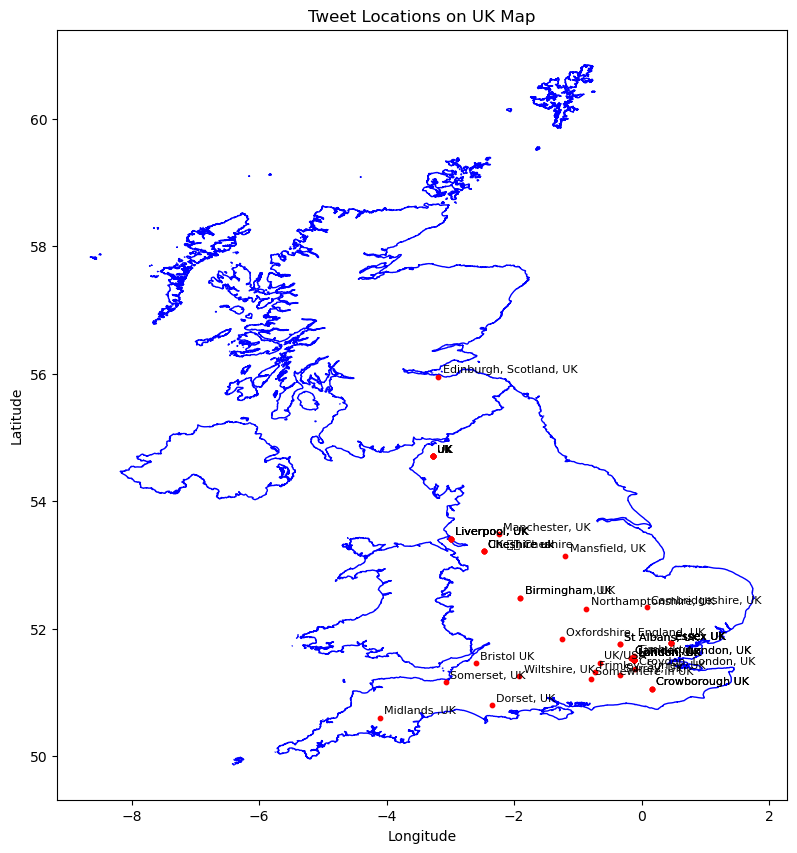

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Filter the GeoDataFrame to include only tweets from the UK
uk_gdf = gdf[gdf['user_location'].str.contains('UK', na=False, case=False)]

# Load UK map data (ensure you have the 'gadm36_GBR_1.shp' shapefile in your working directory)
uk_map = gpd.read_file('gadm41_GBR_1.json')

# Create the UK map plot with a larger figsize
fig, ax = plt.subplots(figsize=(25, 10))

# Plot the latitude and longitude points on the UK map
uk_map.plot(ax=ax, color='white', edgecolor='blue')
uk_gdf.plot(ax=ax, color='red', markersize=10)

# Annotate the points with city names
for x, y, label in zip(uk_gdf.geometry.x, uk_gdf.geometry.y, uk_gdf['user_location']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8)

# Customize the plot
plt.title('Tweet Locations on UK Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [21]:
import geopandas as gpd
import folium

# Filter the GeoDataFrame to include only tweets from the UK
uk_gdf = gdf[gdf['user_location'].str.contains('UK', na=False, case=False)]

# Drop rows with NaN values in the 'latitude' and 'longitude' columns
uk_gdf = uk_gdf.dropna(subset=['latitude', 'longitude'])

# Load UK map data (ensure you have the 'gadm36_GBR_1.shp' shapefile in your working directory)
uk_map = gpd.read_file('gadm41_GBR_1.json')

# Create a Folium map centered on the UK
m = folium.Map(location=[55.3781, -3.4360], zoom_start=5)

# Add the UK map data to the map
folium.GeoJson(uk_map).add_to(m)

# Add the tweet locations to the map as markers
for lat, lon, label in zip(uk_gdf.latitude, uk_gdf.longitude, uk_gdf['user_location']):
    folium.Marker(location=[lat, lon], popup=label).add_to(m)

# Display the map
m